In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
path = 'data'
train_data = datasets.MNIST(root=path, train=True, transform=transforms.Compose([
    transforms.ToTensor()
]), download=False)
train_data = DataLoader(dataset=train_data, batch_size=128, shuffle=True)

test_data = datasets.MNIST(root=path, train=False, transform=transforms.Compose([
    transforms.ToTensor()
]), download=False)
test_data = DataLoader(dataset=test_data, batch_size=128, shuffle=True)

x, _ = iter(train_data).next()

In [3]:
x.shape

torch.Size([128, 1, 28, 28])

In [4]:
from torch import nn

In [5]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 20),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(20, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        """
        :param x:
        :return:
        """
        batch_size = x.size(0)
        x = x.view(batch_size, 28*28)
        x = self.encoder(x)
        x = self.decoder(x)
        return x.view(batch_size, 1, 28, 28)


In [6]:
device = torch.device('cuda')

In [7]:
model = AE().to(device)
loss_function = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr=0.01)

In [8]:
import tqdm

In [9]:
for epoch in range(3):
    for train_x, _ in tqdm.tqdm(train_data):
        train_x = train_x.to(device)

        x_hat = model(train_x)

        loss = loss_function(train_x, x_hat)
        opt.zero_grad()
        loss.backward()
        opt.step()
    print(f'epoch: {epoch + 1}, loss: {loss.item()}')


100%|██████████| 469/469 [00:09<00:00, 50.86it/s]


epoch: 1, loss: 0.02852211706340313


100%|██████████| 469/469 [00:09<00:00, 51.02it/s]


epoch: 2, loss: 0.025416741147637367


100%|██████████| 469/469 [00:08<00:00, 52.76it/s]

epoch: 3, loss: 0.023747339844703674


In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
device_cpu = torch.device('cpu')
model.to(device_cpu)

AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=20, bias=True)
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=20, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=784, bias=True)
    (5): Sigmoid()
  )
)

(-0.5, 27.5, 27.5, -0.5)

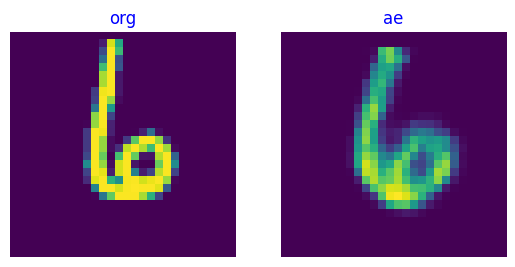

In [13]:
x_eval, _ = iter(test_data).__next__()
x_hat = model(x_eval)
x_eval1 = x_eval[0].detach().numpy()
x_hat1 = x_hat[0].detach().numpy()

plt.subplot(1, 2, 1)
plt.title("org", color='blue')
plt.imshow(np.squeeze(x_eval1))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("ae", color='blue')
plt.imshow(np.squeeze(x_hat1))
plt.axis("off")